# Dataset
https://www.kaggle.com/nowke9/ipldata/
- 'team.csv' : List of ipl teams
- 'match.csv' : IPL match data
- 'deliveries.csv' : Ball by Ball data of ipl upto 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
team_df = pd.read_csv("data/teams.csv")
team_df.head()

name
0               Mumbai Indians
1              Kings XI Punjab
2          Chennai Super Kings
3  Royal Challengers Bangalore
4        Kolkata Knight Riders

In [3]:
matches_df = pd.read_csv("data/matches.csv",index_col='id')
matches_df.head()

season       city        date                        team1  \
id                                                               
1     2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
2     2017       Pune  2017-04-06               Mumbai Indians   
3     2017     Rajkot  2017-04-07                Gujarat Lions   
4     2017     Indore  2017-04-08       Rising Pune Supergiant   
5     2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                          team2                  toss_winner toss_decision  \
id                                                                           
1   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2        Rising Pune Supergiant       Rising Pune Supergiant         field   
3         Kolkata Knight Riders        Kolkata Knight Riders         field   
4               Kings XI Punjab              Kings XI Punjab         field   
5              Delhi Daredevils  Royal Challengers Bangalore           bat   

    result  dl_applied                       winner  win_by_runs  \
id                                                                 
1   normal           0          Sunrisers Hyderabad           35   
2   normal           0       Rising Pune Supergiant            0   
3   normal           0        Kolkata Knight Riders            0   
4   normal           0              Kings XI Punjab            0   
5   normal           0  Royal Challengers Bangalore           15   

    win_by_wickets player_of_match                                      venue  \
id                                                                              
1                0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
2                7       SPD Smith    Maharashtra Cricket Association Stadium   
3               10         CA Lynn     Saurashtra Cricket Association Stadium   
4                6      GJ Maxwell                     Holkar Cricket Stadium   
5                0       KM Jadhav                      M Chinnaswamy Stadium   

           umpire1        umpire2 umpire3  
id                                         
1      AY Dandekar       NJ Llong     NaN  
2   A Nand Kishore         S Ravi     NaN  
3      Nitin Menon      CK Nandan     NaN  
4     AK Chaudhary  C Shamshuddin     NaN  
5              NaN            NaN     NaN

In [4]:
deliveries_df = pd.read_csv("data/deliveries.csv")
deliveries_df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

# 1. Which player has won maximum number of MoM awards ?

In [5]:
matches_df['player_of_match'].value_counts().sort_values(ascending=False).head()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64

# 2. Which batsmen came to crease but never got a chance to face a ball?

In [6]:
non_striker = deliveries_df['non_striker'].value_counts().index

In [7]:
batsman = deliveries_df['batsman'].value_counts().index

In [8]:
non_striker.difference(batsman)

Index(['A Nel', 'BW Hilfenhaus', 'C Ganapathy', 'TP Sudhindra'], dtype='object')

# 3. Which toss decision is best for each ground?

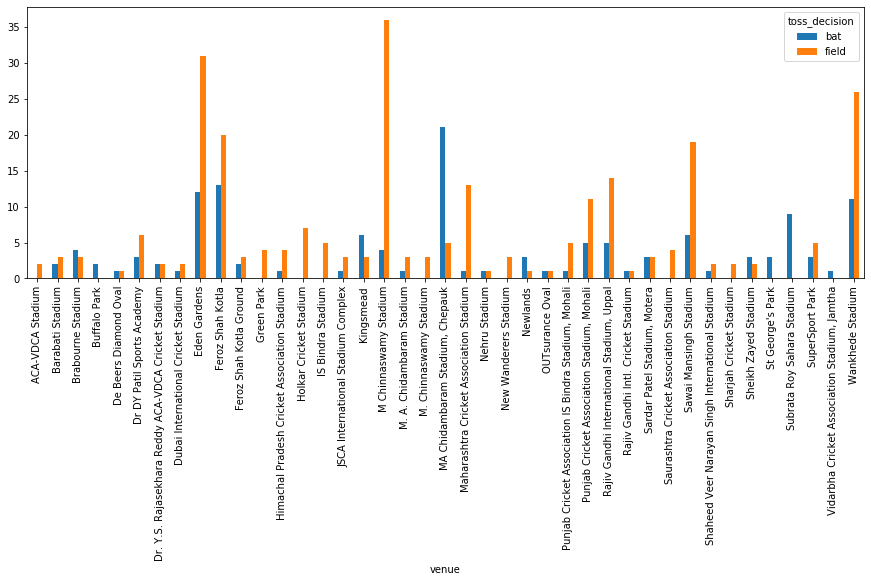

In [9]:
lucky_venue = matches_df.query("toss_winner ==winner").groupby('venue')['toss_decision'].value_counts()
lucky_venue.unstack(level = 1).plot.bar(figsize = (15,5))

# 4. Which Batsmen has played maximum number of dot balls?

In [33]:
dot_balls = dict(deliveries_df.query("batsman_runs == 0 and extra_runs == 0")['batsman'].value_counts())


In [58]:
dot_balls

{'V Kohli': 1369,
 'S Dhawan': 1319,
 'RG Sharma': 1291,
 'CH Gayle': 1236,
 'RV Uthappa': 1223,
 'SK Raina': 1221,
 'G Gambhir': 1170,
 'DA Warner': 1114,
 'AM Rahane': 1096,
 'SR Watson': 1017,
 'MS Dhoni': 972,
 'PA Patel': 929,
 'KD Karthik': 912,
 'BB McCullum': 886,
 'JH Kallis': 878,
 'M Vijay': 870,
 'AT Rayudu': 867,
 'Yuvraj Singh': 864,
 'AB de Villiers': 842,
 'MK Pandey': 813,
 'R Dravid': 746,
 'YK Pathan': 744,
 'DR Smith': 738,
 'SR Tendulkar': 725,
 'SE Marsh': 647,
 'KA Pollard': 635,
 'AC Gilchrist': 628,
 'V Sehwag': 601,
 'NV Ojha': 581,
 'MEK Hussey': 572,
 'SV Samson': 572,
 'SC Ganguly': 567,
 'DPMD Jayawardene': 528,
 'MK Tiwary': 506,
 'AJ Finch': 499,
 'RA Jadeja': 497,
 'F du Plessis': 493,
 'KC Sangakkara': 484,
 'JP Duminy': 480,
 'SS Iyer': 480,
 'KL Rahul': 472,
 'SPD Smith': 456,
 'WP Saha': 451,
 'S Badrinath': 431,
 'Mandeep Singh': 428,
 'Q de Kock': 426,
 'TM Dilshan': 421,
 'KK Nair': 419,
 'DJ Bravo': 410,
 'DA Miller': 389,
 'BJ Hodge': 386,
 'MA

# 5. list the efficiency of batsmen which had played more than 2000 balls

In [26]:
total_balls = dict(deliveries_df['batsman'].value_counts().sort_values(ascending=False))

In [60]:
effi = {} 
for player in total_balls.keys():
    if(total_balls[player] >= 2000):
        effi[player] = dot_balls[player]/total_balls[player]


In [61]:
sorted(effi.items(), key = lambda x : x[1],reverse =False)

[('AB de Villiers', 0.28283506886126974),
 ('MS Dhoni', 0.29294755877034356),
 ('SK Raina', 0.30192878338278933),
 ('KD Karthik', 0.31557093425605537),
 ('YK Pathan', 0.31876606683804626),
 ('AT Rayudu', 0.3233867959716524),
 ('V Kohli', 0.3251009261458086),
 ('DA Warner', 0.32783990582695705),
 ('G Gambhir', 0.33200908059023837),
 ('MK Pandey', 0.3352577319587629),
 ('RG Sharma', 0.33831236897274636),
 ('AM Rahane', 0.3409020217729393),
 ('S Dhawan', 0.3493114406779661),
 ('RV Uthappa', 0.3502290950744559),
 ('SR Tendulkar', 0.3546966731898239),
 ('PA Patel', 0.3801145662847791),
 ('JH Kallis', 0.3832387603666521),
 ('SR Watson', 0.38537324744221296),
 ('BB McCullum', 0.3899647887323944),
 ('Yuvraj Singh', 0.3914816492976892),
 ('CH Gayle', 0.39476205685084637),
 ('M Vijay', 0.4020332717190388)]

# 6. which batsman has hit for maximum number of 3s/4s/6s?

In [65]:
deliveries_df.query("batsman_runs == 6")['batsman'].value_counts().head()

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
Name: batsman, dtype: int64

In [66]:
deliveries_df.query("batsman_runs == 4")['batsman'].value_counts().head()

S Dhawan     526
SK Raina     495
G Gambhir    492
V Kohli      482
DA Warner    459
Name: batsman, dtype: int64

In [67]:
deliveries_df.query("batsman_runs == 3")['batsman'].value_counts().head()

S Dhawan          18
DA Warner         18
M Vijay           17
AM Rahane         15
AB de Villiers    15
Name: batsman, dtype: int64

# 7. Which Batsman got stumped out maximum number of times?

In [68]:
deliveries_df.query("dismissal_kind == 'stumped'")['batsman'].value_counts().head()

SK Raina        8
AT Rayudu       7
RV Uthappa      7
PA Patel        6
F du Plessis    6
Name: batsman, dtype: int64

# 8. Which non-strikers has been part of maximum number of runouts?

In [69]:
deliveries_df.query("dismissal_kind == 'run out'")['non_striker'].value_counts().head()

SK Raina          16
KD Karthik        16
RG Sharma         15
YK Pathan         14
AB de Villiers    14
Name: non_striker, dtype: int64

# 9. Which team has won/lost maximum number of matches while chasing?

In [70]:
def set_first_innings(match):
    if (match.team1 == match.toss_winner and match.toss_decision == "bat") \
    or (match.team1 != match.toss_winner and match.toss_decision == "field"):
        return match.team1
    else:
        return match.team2
    
    
def set_second_innings(match):
    if (match.team1 == match.toss_winner and match.toss_decision == "field") \
    or (match.team1 != match.toss_winner and match.toss_decision == "bat"):
        return match.team1
    else:
        return match.team2

In [71]:
matches_df['inning1'] = matches_df.apply(set_first_innings, axis=1)
matches_df['inning2'] = matches_df.apply(set_second_innings, axis=1)

In [72]:
# maximum number of matches won while chasing
matches_df.query("winner == inning2")['inning2'].value_counts()

Kolkata Knight Riders          58
Mumbai Indians                 51
Chennai Super Kings            49
Royal Challengers Bangalore    49
Rajasthan Royals               46
Kings XI Punjab                44
Delhi Daredevils               42
Sunrisers Hyderabad            28
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  7
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         5
Kochi Tuskers Kerala            4
Name: inning2, dtype: int64

In [73]:
# maximum number of matches lost while chasing
matches_df.query("winner != inning2")['inning2'].value_counts()

Delhi Daredevils               47
Royal Challengers Bangalore    46
Kings XI Punjab                41
Kolkata Knight Riders          37
Mumbai Indians                 35
Rajasthan Royals               34
Chennai Super Kings            26
Deccan Chargers                21
Pune Warriors                  20
Sunrisers Hyderabad            17
Gujarat Lions                   4
Rising Pune Supergiant          3
Delhi Capitals                  3
Kochi Tuskers Kerala            3
Rising Pune Supergiants         2
Name: inning2, dtype: int64